### ESMA 3016
### Edgar Acuna
### Lab18: Distribucion de la Media Muestral y el Teorema del Limte Central (Liapunov, 1901)
### Octubre del 2020

In [4]:
from scipy.stats  import norm
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,factorial,pi
%matplotlib inline

In [5]:
#Poblacion
x=[3, 4, 6, 8, 10, 11, 12, 15, 20]

Calculando la media $\mu$ y la desviacion estandar $\sigma$ poblacionales

In [6]:
print('media=', np.mean(x), 'Desviacion Estandar=', np.std(x))

media= 9.88888888888889 Desviacion Estandar= 5.1086950811433995


In [7]:
#Simulando 50 muestras de tamano 30 de dicha poblacion
a=np.random.choice(x, 1500, replace=True)
b=a.reshape(50,30)
print(b)

[[12  6  8 ... 15 15  8]
 [ 8  8 20 ... 12 10  8]
 [10 11 15 ... 12  4  3]
 ...
 [11 20 11 ... 10 20 15]
 [11 15  3 ...  6  4 10]
 [ 6 12 15 ...  3  8 10]]


In [8]:
#Calculando las medias de la 50 muestras
medias1=b.mean(axis=1)
print(medias1)

[11.3         8.         11.53333333 11.2         8.9        10.2
  8.83333333  9.3         7.8         9.5        10.26666667 10.73333333
  9.23333333 10.          9.13333333 11.06666667  9.96666667 10.4
 10.56666667 12.63333333 10.          9.86666667  9.03333333  9.7
  9.73333333  9.03333333  9.23333333 10.          8.7        10.1
  8.66666667  9.5        10.83333333 10.23333333  9.96666667 10.06666667
 10.26666667  9.4        11.23333333 10.         10.5         9.86666667
  9.1         9.6         9.76666667  9.36666667 10.         10.3
  9.96666667 10.63333333]


In [9]:
#Calculando la media y estandar desviacion de las 50 medias
mean2=np.mean(medias1)
sd2=np.std(medias1,ddof=1)
print('media de las medias muestrals=', mean2,'desviacion estandar de la media muestral=',sd2)

media de las medias muestrals= 9.904666666666666 desviacion estandar de la media muestral= 0.8918631927871707


In [10]:
#Calculando sigma/sqrt(n)
np.std(x)/sqrt(30)

0.9327158451193083

Se puede notar que las medias de las medias muestrales es aprox igual a la media poblacional y que la desviacion estandar de las medias muestrales es aprox $\frac{\sigma}{\sqrt{n}}$

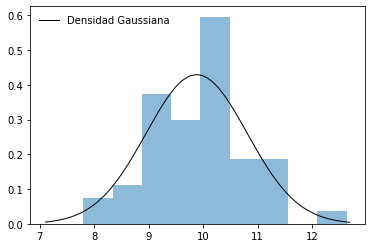

In [11]:
x=np.arange(7.1,12.7,.01)
fig, ax = plt.subplots(1, 1)
ax.hist(medias1,bins=9,density = True,alpha=.5)
ax.plot(x, norm.pdf(x,loc=9.88,scale=.93), 'k-', lw=1, label='Densidad Gaussiana')
ax.legend(loc='best', frameon=False)

Ejemplo 1. Un Banco afirma la cantidad semanal que extraen sus clientes de los cajero automaticos tiene una distribucion con media 80 dolares y desviacion estandar 20.
 Se elige al azar una muestra de la cantidad de dinero extraida por 12 individuos.
 
    a) Cual es  la probabilidad de que la cantidad promedio extraida por los indivudos de la muestra sea menor que 90?
    

Sol: Hay que hallar $P(\bar{X}<90)$

 $\bar{X}$ se distribuye como una normal con media $\mu=80$ y desviacion estandar $\frac{20}{\sqrt{12}}$

In [26]:
prob=norm.cdf(90,80,20/sqrt(12))
prob

0.9583677416682248

b) Cual es la probabilidad de que a cantidad promedio extraida por las 12 personas exceda a 70 pero sea menor que 85

In [27]:
prob1=norm.cdf(85,80,20/sqrt(12))-norm.cdf(70,80,20/sqrt(12))
prob1

0.7651296262826084

Ejemplo 2. Según reportes del centro nacional para estadísticas de salud, alrededor del 20 % de la población masculina adulta de los Estados Unidos es obesa.  Se elige al azar una muestra de 150 hombres adultos en los Estados Unidos. ¿Cuál es la probabilidad de que:

	a) Haya a lo más 25 personas obesas?
	b) Haya más de 22 pero menos de 35 obesos?
	c) Haya por lo menos un  25% de obesos en la muestra?

In [28]:
from scipy.stats  import binom
p1=binom.cdf(25,150,.20)

In [29]:
p1

0.1799257342392581

In [30]:
from math import sqrt
media=150*.2;
stdev=sqrt(150*.2*.8)

In [31]:
p1approx=norm.cdf(25.5,media,stdev)
p1approx

0.17916323337444012

In [32]:
p2=binom.cdf(34,150,.2)-binom.cdf(22,150,.2)
p2

0.7627679367830503

In [33]:
p2_approx=norm.cdf(34.5,media,stdev)-norm.cdf(22.5,media,stdev)
p2_approx

0.7579435543060898

In [34]:
p3=1-norm.cdf(.25,.20,sqrt(.2*.8/150))
p3

0.0628932123194701

In [35]:
norm.cdf(.35,.30,sqrt(.3*.7/350))-norm.cdf(.25,.30,sqrt(.3*.7/350))

0.9587731666628363